# Data Exploration and Scikit-Learn

In this final Python lesson, we'll use everything we've learned so far and work with some real datasets. We'll also finally use the Scikit-Learn library (called `sklearn` in Python) to do some basic machine learning on some sample data.

## Some important imports

In Jupyter Notebooks, we can import the libraries we need once, and then use the libraries on all future code blocks without needing to re-import everything. 

Run the following code block:

In [ ]:
%matplotlib inline
import sklearn
import pandas
import numpy as np
import matplotlib.pyplot as plt

## Get that dataset!

Before we can start to do machine learning, we need to have data to train our systems on. If you remember in the "Introduction to Machine Learning" lesson, datasets aren't always easy to come by, and many are privately collected and owned. Very often, if you want to work on a new machine learning application, you may have to figure out how to collect your own data.

However, there are many great services that have open and free datasets that you can use, like [Kaggle](https://www.kaggle.com/). For this lesson, we'll use a modified dataset from Kaggle that contains Spotify information on the top songs of 2017.

## Grabbing datasets from GitHub

We've actually stored the dataset in a different website, called [GitHub](https://github.com/), so that we can easily grab the data for this lesson.

Be sure to run each of the code blocks below. They're not written in Python -- they're written in a different language called Bash, which is typically used on the command line and can manipulate things like files on your computer.

You don't have to worry about what each of these code blocks does, just that they help us pull data from GitHub so that we have access to it within this Notebook. (Almost like how we need to import libraries before we can start to use them.)

In [ ]:
# The following is not a Python command, but a bash command
# It looks at the files and folders in this current directory
! ls

sample_data


In [ ]:
# This checks if the directory called "spotify-data-ai4all" exists, and if so, remove it
! if [ -d "spotify-data-ai4all" ]; then rm -r spotify-data-ai4all; fi
! ls

sample_data


In [ ]:
# This creates a new directory based on a repo from my GitHub
! git clone https://github.com/mleszczy/spotify-data-ai4all

Cloning into 'spotify-data-ai4all'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6 (delta 1), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
# This is for us to check that the directory was successfully downloaded
! ls

sample_data  spotify-data-ai4all


# Spotify's Top Songs of 2017

Let's say that you were interested in music and wanted to create a machine learning system to suggest a new song for someone to listen to. How would we create this?

Well first, we would need to have some data on what music people like. Once we have that data, we might start to think about the different qualities of a song, so you can recommend new songs based on similar qualities from songs a person has listened to.

The Spotify Top Songs of 2017 dataset contains exactly that information, so let's see how we would start to use it.

## Working with Pandas

Before we jump into machine learning, let's practice looking at datasets and exploring them. We'll use a library called `pandas` to help us do this.

We've already imported `pandas` earlier in the Notebook, so we can use it in the following code blocks. If you did not run the first code block of this lesson, the following code will raise an error.

In [ ]:
# This is the file name of the Spotify dataset
# It's a "CSV" file, which stands for "comma-separated values file"
# Really, it's just a long text file with a lot of information separated by commas
filename = "spotify-data-ai4all/spotify.csv"

# We will use a function built into pandas to read our csv data
data = pandas.read_csv(filename)

# Finally, we'll print the data to take a look at it
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,1664,0.0294,0.591,228347,0.649,0.000000,3,0.1330,-6.720,1,0.0417,90.002,4.0,0.482,0,Fireflies,Owl City
1,1665,0.0314,0.559,205933,0.882,0.000017,3,0.6050,-4.281,1,0.1570,126.064,4.0,0.644,0,Good Time,Owl City
2,1666,0.0243,0.631,218093,0.838,0.000000,11,0.0512,-6.817,0,0.0818,127.938,4.0,0.392,0,When Can I See You Again?,Owl City
3,1667,0.0002,0.550,213026,0.747,0.000001,2,0.1130,-6.897,1,0.0334,128.014,4.0,0.185,0,Verge,Owl City
4,1668,0.0082,0.581,231707,0.526,0.000369,11,0.1130,-7.584,1,0.0265,166.151,4.0,0.551,0,Vanilla Twilight,Owl City


The print-out of our data above looks... not too informative. This is mainly because Jupyter Notebooks doesn't format it nicely for us when we directly print all of the data. Instead, we'll have to use some functions in `pandas` to explore the data ourselves.

By the way, if you want to see the data in this dataset as a table, you can [click here to see it displayed in GitHub](https://github.com/mleszczy/spotify-data-ai4all/blob/master/spotify.csv). We'll also write some code so that we can visualize our data in table form.

There are 36 rows in this dataset and 17 columns, where each row is a single song and (almost) each column is a **feature** of the song. In terms of dataset size, this is a very small dataset for example purposes -- some datasets may have thousands or even millions of rows.

## Exploring some features

Recall that our data in datasets is described by a set of properties called features.

For song data, some features you might expect are tempo, time signature, and name.

Let's print all of the names of the songs:

In [ ]:
# Notice that we didn't just say "name"
# Like with accessing values in dictionaries, the specific key value in this data set is "song_title"
print(data["artist"])

0            Owl City
1            Owl City
2            Owl City
3            Owl City
4            Owl City
5              *NSYNC
6              *NSYNC
7              *NSYNC
8              *NSYNC
9              *NSYNC
10             *NSYNC
11    Backstreet Boys
12    Backstreet Boys
13    Backstreet Boys
14    Backstreet Boys
15    Backstreet Boys
16    Backstreet Boys
17    Backstreet Boys
18    Backstreet Boys
19    Michael Jackson
20    Michael Jackson
21    Michael Jackson
22    Michael Jackson
23    Michael Jackson
24    Michael Jackson
25             *NSYNC
26    Backstreet Boys
27    Backstreet Boys
28    Michael Jackson
29    Michael Jackson
30         Nickelback
31         Nickelback
32         Nickelback
33         Nickelback
34         Nickelback
Name: artist, dtype: object


The above code prints the song titles for all 2017 songs in our dataset. However, if we wanted to recommend a new song to someone, it probably wouldn't be enough to just recommend them based on song title. We'll want to make use of multiple features, and it may help us to visualize them to find patterns in the data.

How do we know what all of the features in our dataset are? One way is to look directly at the CSV file, because these are usually the column headers that are on the first line of the file. (We could also look at the column headings in GitHub since it displays all of the data in a table nicely for us.) Since we're trying to work with our Python code as much as possible, let's see how we would do it in Python:

In [ ]:
filename = "spotify-data-ai4all/spotify.csv"
raw_data = pandas.read_csv(filename)

# Get the values of the columns (the features) and print them out
features = raw_data.columns.values
print(features)

['Unnamed: 0' 'acousticness' 'danceability' 'duration_ms' 'energy'
 'instrumentalness' 'key' 'liveness' 'loudness' 'mode' 'speechiness'
 'tempo' 'time_signature' 'valence' 'target' 'song_title' 'artist']


We see from the printout different features of our songs, such as tempo, acoustiness (how many acoustic sounds, like an acoustic guitar, are in a song), title, and artist. The first column is actually used to index the songs (so we can refer to them by number), and that's why the column title shows as "Unnamed: 0". This particular column is not a feature of our data.

For now, let's work with just a small amount of our dataset -- four features (tempo, acousticness, song title, and artist) and 20 songs.

In [ ]:
filename = "spotify-data-ai4all/spotify.csv"
raw_data = pandas.read_csv(filename)

# In pandas, we put our data into data frames so that we can manipulate them
# This takes two parameters: raw_data specifies that we're using the music data from above
# columns specifies what columns of that data we want to keep
data = pandas.DataFrame(raw_data, columns=['tempo', 'acousticness', 'song_title', 'artist'])

# Remember slicing? We use that to take just the first 20 songs in our dataset
data = data[:20]

# This will display our data in a nice table
# Typically we need to use print(), but our variable 'data' is a pandas DataFrame which has special display properties
data

,tempo,acousticness,song_title,artist
0,90.002,0.02940,Fireflies,Owl City
1,126.064,0.03140,Good Time,Owl City
2,127.938,0.02430,When Can I See You Again?,Owl City
3,128.014,0.00020,Verge,Owl City
4,166.151,0.00820,Vanilla Twilight,Owl City
5,172.716,0.01980,Bye Bye Bye,*NSYNC
6,166.004,0.30000,This I Promise You - Radio Edit,*NSYNC
7,165.103,0.04790,It's Gonna Be Me,*NSYNC
8,112.042,0.07430,I Want You Back - Radio Edit,*NSYNC
9,119.941,0.04120,Pop - Radio Version,*NSYNC


There! Now we have something that's more manageable.

## Comparing features of songs

Say we know someone likes the song "Fireflies" by Owl City, and we want to recommend them another song based off of similarity to "Fireflies".

Perhaps we think that the tempo (or speed) of the song might be helpful, so we'll look for songs that are similar in tempo to "Fireflies" (which is tempo = 90.002 beats per minute).

In [ ]:
# Let's keep track of the Fireflies tempo
fireflies_tempo = 90.002

# Let's create a new column in our dataset
# The value of this column is the difference in tempo from that song and the tempo of "Fireflies"
# The function abs() takes the absolute value, because we just need to know the difference in tempo,
# but not if that tempo is faster or slower than "Fireflies"
data['tempo_difference'] = abs(fireflies_tempo - data.tempo)
data

,tempo,acousticness,song_title,artist,tempo_difference
0,90.002,0.02940,Fireflies,Owl City,2.842171e-14
1,126.064,0.03140,Good Time,Owl City,3.606200e+01
2,127.938,0.02430,When Can I See You Again?,Owl City,3.793600e+01
3,128.014,0.00020,Verge,Owl City,3.801200e+01
4,166.151,0.00820,Vanilla Twilight,Owl City,7.614900e+01
5,172.716,0.01980,Bye Bye Bye,*NSYNC,8.271400e+01
6,166.004,0.30000,This I Promise You - Radio Edit,*NSYNC,7.600200e+01
7,165.103,0.04790,It's Gonna Be Me,*NSYNC,7.510100e+01
8,112.042,0.07430,I Want You Back - Radio Edit,*NSYNC,2.204000e+01
9,119.941,0.04120,Pop - Radio Version,*NSYNC,2.993900e+01


### Visualizing the tempo difference

We can look at the column `tempo_difference` in our table above to see which songs have similar tempos to "Fireflies". Another way to present this information is to visualize it in a graph:

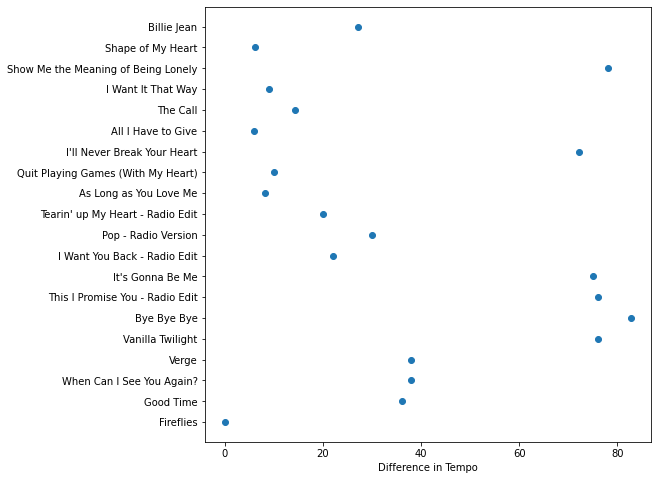

In [ ]:
# Remember that we've imported matplotlib.pyplot as plt at the start of the Notebook
# Here we will use pyplot to do our visualization
plt.figure(figsize=(8,8))
plt.scatter(data['tempo_difference'], data['song_title'])
plt.xlabel('Difference in Tempo')
plt.show()

Take a moment to look at the graph and see what's going on. The y-axis of the graph is _discrete_ -- each y-value refers to a specific song. The x-axis of the graph is the tempo difference. 

Points that are closer to the left have smaller differences in tempo, whereas points that are closer to the right have larger differences in tempo.

Looking at the graph above, which song has the largest difference in tempo from "Fireflies"?

### Finding the acousticness difference

Let's do the same for acousticness, which we might think is another good measure of song similarity.

The acousticness of a song is measured from 0 to 1, with 0 being no acousticness (all electronic sounds) and 1 being all acoustic (imagine an acoustic guitar on its own). The acoustiness of "Fireflies" is 0.02940.

In [ ]:
# Add new column for acoustic difference
data['acoustic_difference'] = abs(0.02940 - data.acousticness)
data

,tempo,acousticness,song_title,artist,tempo_difference,acoustic_difference
0,90.002,0.02940,Fireflies,Owl City,2.842171e-14,0.00000
1,126.064,0.03140,Good Time,Owl City,3.606200e+01,0.00200
2,127.938,0.02430,When Can I See You Again?,Owl City,3.793600e+01,0.00510
3,128.014,0.00020,Verge,Owl City,3.801200e+01,0.02920
4,166.151,0.00820,Vanilla Twilight,Owl City,7.614900e+01,0.02120
5,172.716,0.01980,Bye Bye Bye,*NSYNC,8.271400e+01,0.00960
6,166.004,0.30000,This I Promise You - Radio Edit,*NSYNC,7.600200e+01,0.27060
7,165.103,0.04790,It's Gonna Be Me,*NSYNC,7.510100e+01,0.01850
8,112.042,0.07430,I Want You Back - Radio Edit,*NSYNC,2.204000e+01,0.04490
9,119.941,0.04120,Pop - Radio Version,*NSYNC,2.993900e+01,0.01180


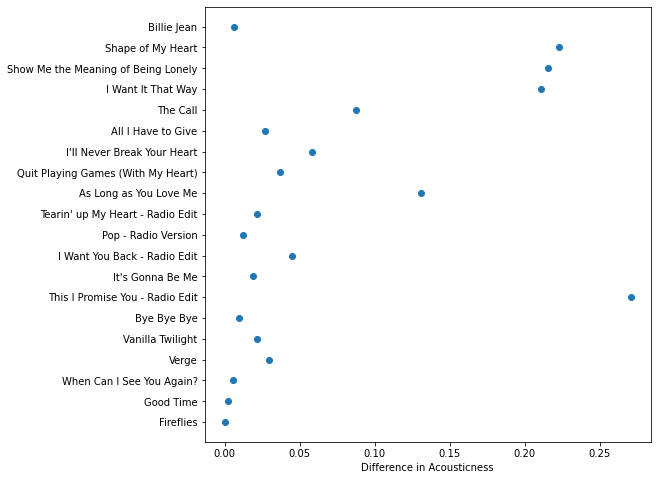

In [ ]:
# Visualize it
plt.figure(figsize=(8,8))
plt.scatter(data['acoustic_difference'], data['song_title'])
plt.xlabel('Difference in Acousticness')
plt.show()

(array([1., 0., 0., 2., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 1., 1., 0., 1.]),
 array([ 90.002  ,  91.65628,  93.31056,  94.96484,  96.61912,  98.2734 ,
         99.92768, 101.58196, 103.23624, 104.89052, 106.5448 , 108.19908,
        109.85336, 111.50764, 113.16192, 114.8162 , 116.47048, 118.12476,
        119.77904, 121.43332, 123.0876 , 124.74188, 126.39616, 128.05044,
        129.70472, 131.359  , 133.01328, 134.66756, 136.32184, 137.97612,
        139.6304 , 141.28468, 142.93896, 144.59324, 146.24752, 147.9018 ,
        149.55608, 151.21036, 152.86464, 154.51892, 156.1732 , 157.82748,
        159.48176, 161.13604, 162.79032, 164.4446 , 166.09888, 167.75316,
        169.40744, 171.06172, 172.716  ]),
 <a list of 50 Patch objects>)

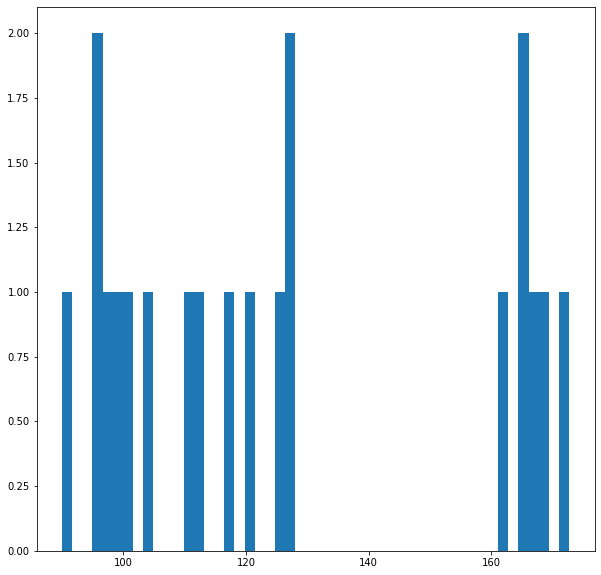

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(data['tempo'], bins=50)

What song is most different in acousticness to "Fireflies"?

## Recommendation based on similarity

Now we want to recommend a song based on its similarity to "Fireflies", in terms of both tempo and acousticness. Looking at the two graphs above, which song might you say is closest to "Fireflies" for both features?

Take a moment to look at both graphs and try to decide!



---

One possible recommendation is the song "All I Have to Give", which is similar in both tempo and acousticness. Let's listen to a bit of the two songs to see if we think that's accurate:

> Fireflies: https://www.youtube.com/watch?v=psuRGfAaju4&ab_channel=OwlCityVEVO

> All I Have to Give: https://www.youtube.com/watch?v=pj6FCKm8dhM&ab_channel=BackstreetBoysVEVO

Though they sound very different from one another, you can indeed say that the features like tempo are similar. However, upon listening to the songs themselves, you might come to the conclusion that they don't _really_ sound similar. Perhaps other features of songs, like genre, may be better features to recommend off of. It's an open question! 

Part of the work when developing a recommendation system like this is to see which features give better recommendations, and to select what the best features might be. We might know that "Fireflies" and "All I Have to Give" are similar songs in terms of tempo and acoustiness, but this might not mean that they're similar with regards to other features.

### Quantifying similarity with multiple features

Before we move on to using Scikit-Learn, let's try to quantify the similarity between songs using both tempo and acousticness together. Previously, we had calculated the tempo difference and the acousticness difference separately, and can compare songs based on one feature or the other. 

When we tried to find the most similar song using both features, we mainly approached it by visually inspecting the two graphs.

But how can we calculate similarity with respect to both features, in a quantifiable way?

First, let's see if we can visualize our 20 songs on the same graph, with both tempo and acoustiness features represented:

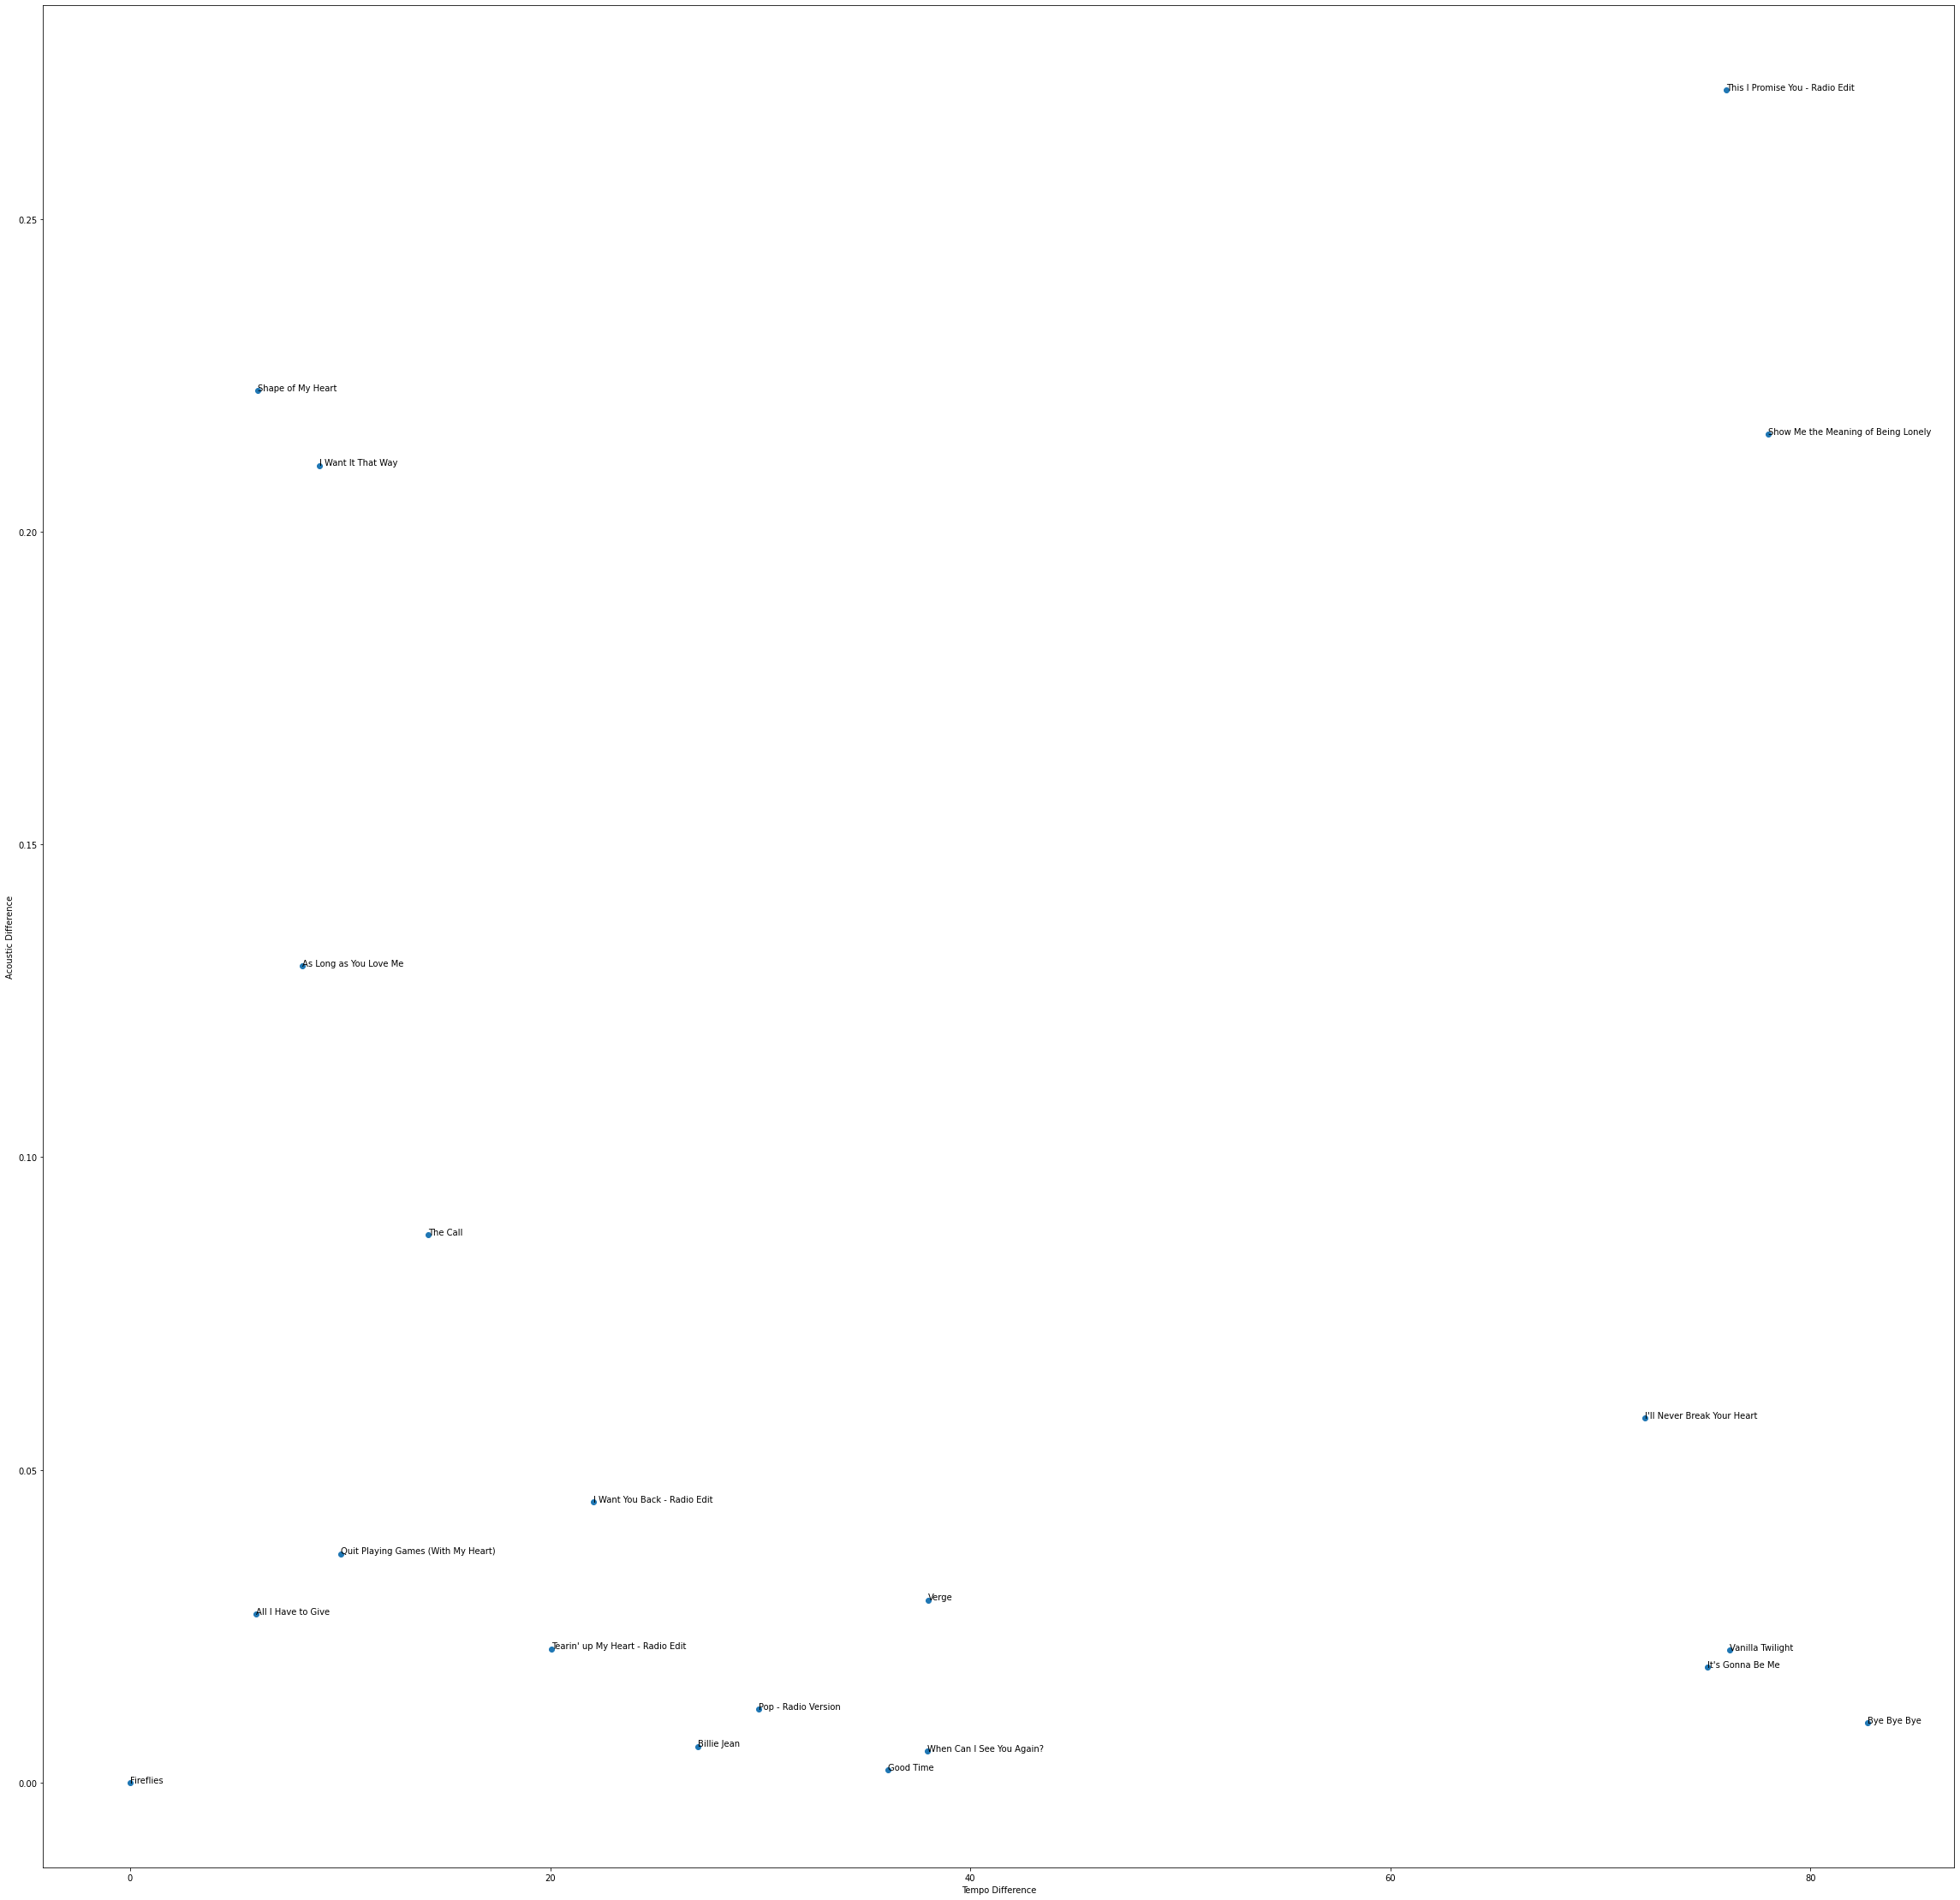

In [ ]:
# The x-axis is tempo
# The y-axis is acousticness
plt.scatter(data['tempo_difference'], data['acoustic_difference'])
plt.xlabel('Tempo Difference')
plt.ylabel('Acoustic Difference')

# Set the figure size of the plot so it's not too small to read
plt.rcParams["figure.figsize"] = 20, 20

# This loop goes through each point on the graph and labels it with the song title
for index, row in data.iterrows():
    plt.annotate(row['song_title'], xy=(row['tempo_difference'], row['acoustic_difference']))

From this visualization, where we look at both features at once, it's a lot clearer that "All I Have to Give" is very similar to "Fireflies" in terms of both acousticness and tempo difference, whereas "This I Promise You" is very different.



---

On the visualization above, we might realize that we can quantify 'similarity' as the distance between two points. The shorter the distance from "Fireflies", the more similar the song represented by that point is. We can make use of this intuition to numerically compute similarity across both features.

How do we compute distance again? We use the distance formula!

$$ distance = \sqrt{(y_2 - y_1)^{2} + (x_2 - x_1)^{2}} $$

In words, we take the squared difference of both features, add them, and then take the square root.

Let's say $ (x_2, y_2) $ is our point representing "Fireflies", which is at $(0,0)$. To find the distance to the point representing "All I Have to Give", we substitute for $x_1$ and $y_1$ the values of "All I Have to Give", which are 5.979 and 0.01000.

Written out:

$$ distance = \sqrt{(0.027 - 0)^{2} + (5.979 - 0)^{2}} $$
$$ distance = 5.979 $$ 

We can write this out in code and create a new column based on "distance" from Fireflies":

In [ ]:
fireflies_tempo = 90.002
fireflies_acousticness = 0.02940
data["distance"] = np.sqrt((data.acousticness - fireflies_acousticness) ** 2 + (data.tempo - fireflies_tempo) ** 2)

# Let's sort the dataset in terms of distance
sorted_dataset_distance = data.sort_values('distance')

sorted_dataset_distance

,tempo,acousticness,song_title,artist,tempo_difference,acoustic_difference,distance
0,90.002,0.02940,Fireflies,Owl City,2.842171e-14,0.00000,2.842171e-14
14,95.981,0.05630,All I Have to Give,Backstreet Boys,5.979000e+00,0.02690,5.979061e+00
18,96.090,0.25200,Shape of My Heart,Backstreet Boys,6.088000e+00,0.22260,6.092068e+00
11,98.205,0.16000,As Long as You Love Me,Backstreet Boys,8.203000e+00,0.13060,8.204040e+00
16,99.035,0.24000,I Want It That Way,Backstreet Boys,9.033000e+00,0.21060,9.035455e+00
12,100.031,0.06600,Quit Playing Games (With My Heart),Backstreet Boys,1.002900e+01,0.03660,1.002907e+01
15,104.202,0.11700,The Call,Backstreet Boys,1.420000e+01,0.08760,1.420027e+01
10,110.046,0.00799,Tearin' up My Heart - Radio Edit,*NSYNC,2.004400e+01,0.02141,2.004401e+01
8,112.042,0.07430,I Want You Back - Radio Edit,*NSYNC,2.204000e+01,0.04490,2.204005e+01
19,117.046,0.02360,Billie Jean,Michael Jackson,2.704400e+01,0.00580,2.704400e+01


Now we have a column that tells us numerically which song is closest to "Fireflies" in terms of both tempo and acousticness!

### Normalizing our data

But wait a minute... if we take a close look at the `tempo_difference` and `distance` columns, we will notice that the two are very similar. This makes sense, because while tempo values range anywhere from 0 to 161 in our dataset, acousticness only goes from 0 to 1. The `tempo_difference` completely overshadows the `acoustic_difference` when we calculate `distance`.

In data science and machine learning, it's very common for different features to work on completely different scales. This means that we cannot compare two features directly against one another, without first **normalizing** the data to the same scale across all features. Typically, normalizing our data means scaling the values of our features to a range between 0 and 1.

We won't cover normalizing in this lesson, but it's good to be aware that this is a typical process that we perform on our data before using it to train a machine learning system.